In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
import h5py
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer, AveragePooling2D
random.seed(10)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


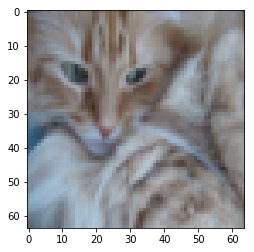

In [4]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [6]:
train_x = np.stack(train_set_x_orig)

In [7]:
train_x.shape

(209, 64, 64, 3)

In [8]:
train_x = train_x / 255.0
train_x = train_x.reshape(-1, 4096,3).astype('float32')

In [9]:
train_x.shape

(209, 4096, 3)

In [10]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [11]:
test_x = np.stack(test_set_x_orig)

In [12]:
test_x = test_x / 255.0
test_x = test_x.reshape(-1, 4096,3).astype('float32')

In [13]:
train_y = keras.utils.np_utils.to_categorical(train_set_y)

In [14]:
train_y = train_y.reshape(209, 2)

In [15]:
split_size = int(train_x.shape[0]*0.7)

In [16]:
train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [25]:
train_x_temp = train_x.reshape(-1, 64, 64, 3)
val_x_temp = val_x.reshape(-1, 64, 64, 3)

# define vars
input_shape = (4096,)
input_reshape = (64, 64, 3)

# conv_num_filters = 5
# conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 25
output_num_units = 2

epochs = 50
batch_size = 1

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, 5, 5, activation='relu', name = 'Conv1'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling1'),

 Convolution2D(25, 5, 5, activation='relu', name = 'Conv2'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling2'),

 Convolution2D(25, 4, 4, activation='relu', name = 'Conv3'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling3'),
    
 Convolution2D(25, 4, 4, activation='relu', name = 'Conv4'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling4'),


 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu', name = 'Dense1'),
 Dropout(0.5),
 Dense(output_dim=output_num_units, activation='softmax', name = 'out'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu", name="Conv1")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu", name="Conv2")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu", name="Conv3")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu", name="Conv4")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", name="Dense1", units=25)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 60, 60, 25)        1900      
_________________________________________________________________
Pooling1 (MaxPooling2D)      (None, 30, 30, 25)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 26, 26, 25)        15650     
_________________________________________________________________
Pooling2 (MaxPooling2D)      (None, 13, 13, 25)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 10, 10, 25)        10025     
_________________________________________________________________
Pooling3 (MaxPooling2D)      (None, 5, 5, 25)          0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 2, 2, 25)          10025     
__________

In [26]:
trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, validation_data=(val_x_temp, val_y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 146 samples, validate on 63 samples
Epoch 1/50
146/146 [==============================] - 1s 7ms/step - loss: 0.6691 - acc: 0.5890 - val_loss: 0.6268 - val_acc: 0.6825
Epoch 2/50
146/146 [==============================] - 1s 4ms/step - loss: 0.6456 - acc: 0.6438 - val_loss: 0.6278 - val_acc: 0.6825
Epoch 3/50
146/146 [==============================] - 1s 4ms/step - loss: 0.6355 - acc: 0.6507 - val_loss: 0.6073 - val_acc: 0.6825
Epoch 4/50
146/146 [==============================] - 1s 4ms/step - loss: 0.6291 - acc: 0.6370 - val_loss: 0.5999 - val_acc: 0.6825
Epoch 5/50
146/146 [==============================] - 1s 4ms/step - loss: 0.6233 - acc: 0.6370 - val_loss: 0.5746 - val_acc: 0.6825
Epoch 6/50
146/146 [==============================] - 1s 4ms/step - loss: 0.5981 - acc: 0.6301 - val_loss: 0.5465 - val_acc: 0.6825
Epoch 7/50
146/146 [==============================] - 1s 4ms/step - loss: 0.5606 - acc: 0.6575 - val_loss: 0.4923 - val_acc: 0.6825
Epoch 8/50
146/146 [===========

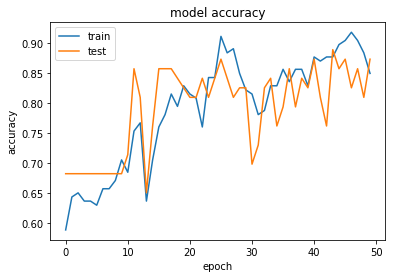

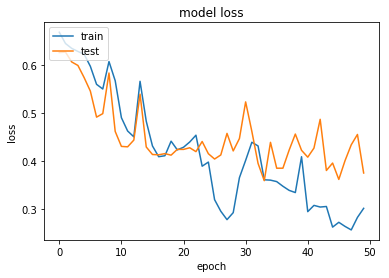

In [27]:
# summarize history for accuracy
plt.plot(trained_model_conv.history['acc'])
plt.plot(trained_model_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model_conv.history['loss'])
plt.plot(trained_model_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()